In [ ]:
from src.image import read_img, get_file_paths, split_brain_and_mask, group_patients, plot_10_brain_images
from src.data_loader import features_generator, generate_x_y

In [ ]:
from joblib import load
from pathlib import Path
from scipy.stats import mode
from itertools import chain
import random
import matplotlib.pyplot as plt
import numpy as np

FIGURES = Path('/content/drive/MyDrive/SLE')

In [ ]:
sle_images = get_file_paths('', ['bmp', 'png'], FIGURES)
sle_brains, sle_masks = split_brain_and_mask(sle_images)
sle_patients_brains, sle_patients_masks = group_patients(sle_brains, sle_masks)

In [ ]:
sle_features = features_generator(sle_patients_brains)

  0%|          | 0/697 [00:00<?, ?it/s]

In [ ]:
X_sle_images = list(chain(*sle_patients_brains.values()))
X_sle_features, _ = generate_x_y(sle_features.keys(), sle_features)

In [ ]:
clf = load('brain-classifier.joblib')
scaler = load('brain-scaler.joblib')

In [ ]:
sle_predictions = clf.predict(scaler.transform(X_sle_features))

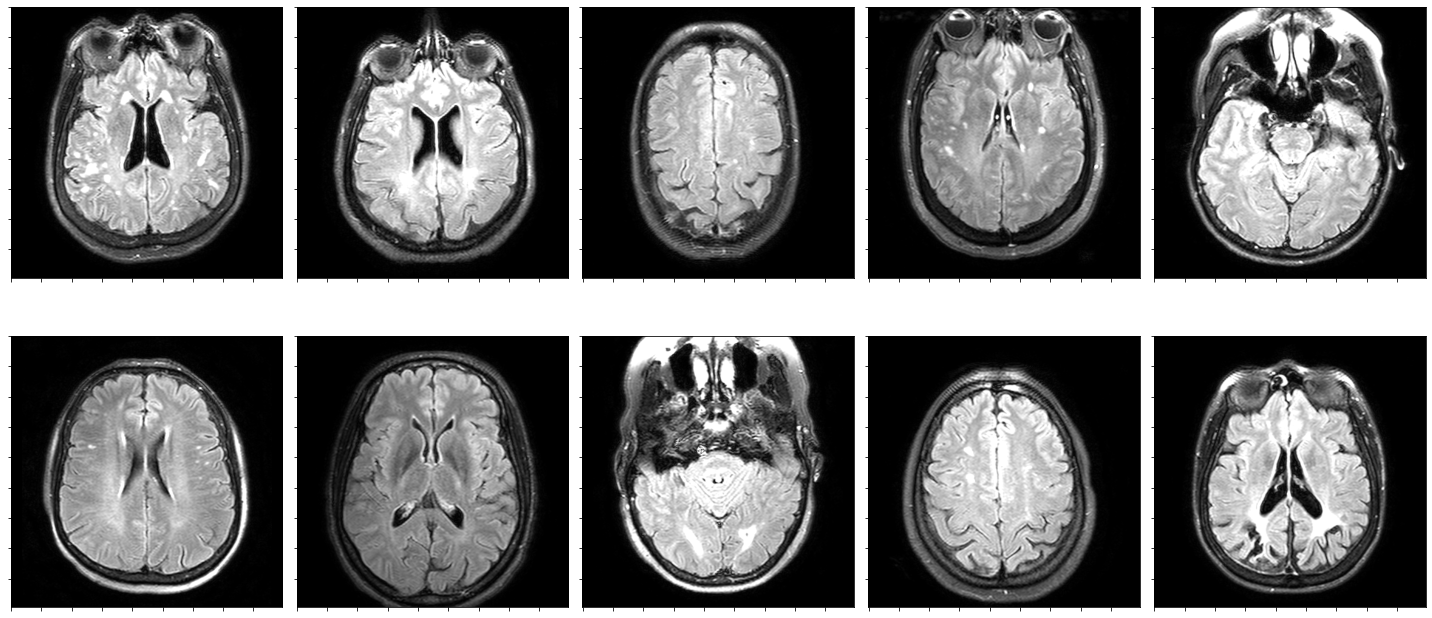

In [ ]:
plot_10_brain_images(random.sample(X_sle_images, 10))

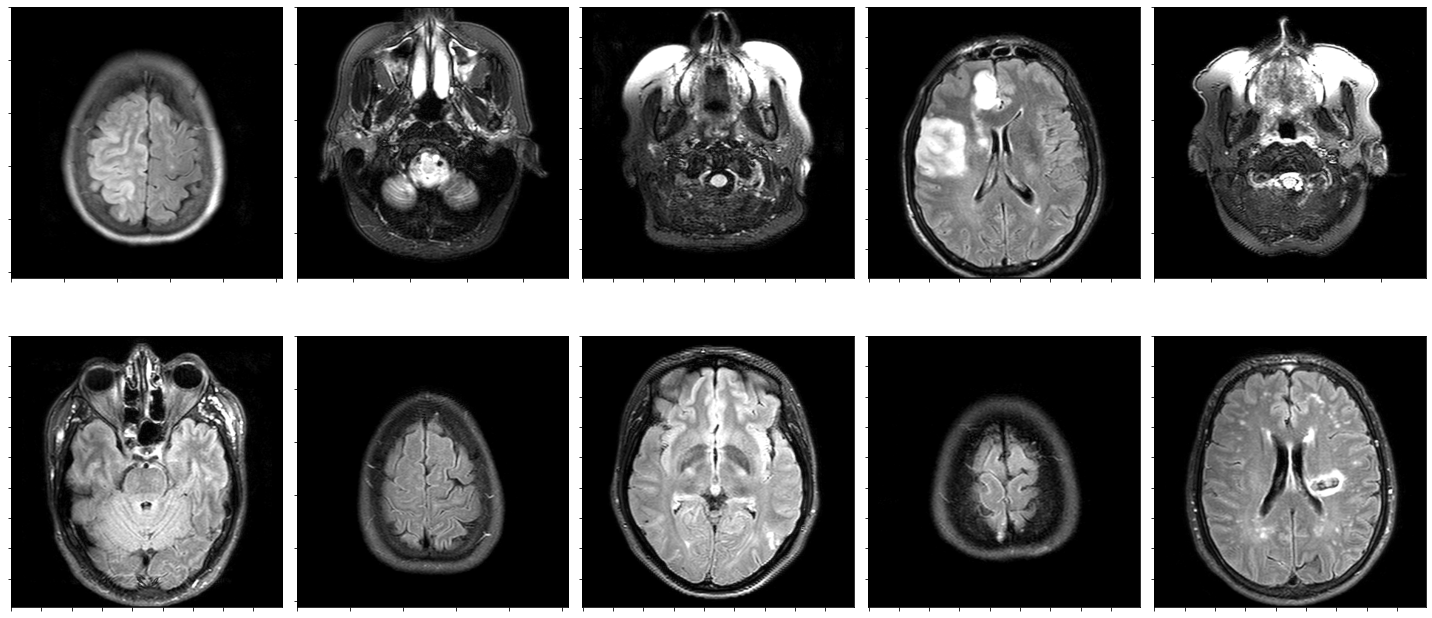

In [ ]:
avc_images = get_file_paths('AVC', ['bmp', 'png'], Path('/content/drive/MyDrive/Train'))
avc_brains, _ = split_brain_and_mask(avc_images)
plot_10_brain_images(random.sample(avc_brains, 10))

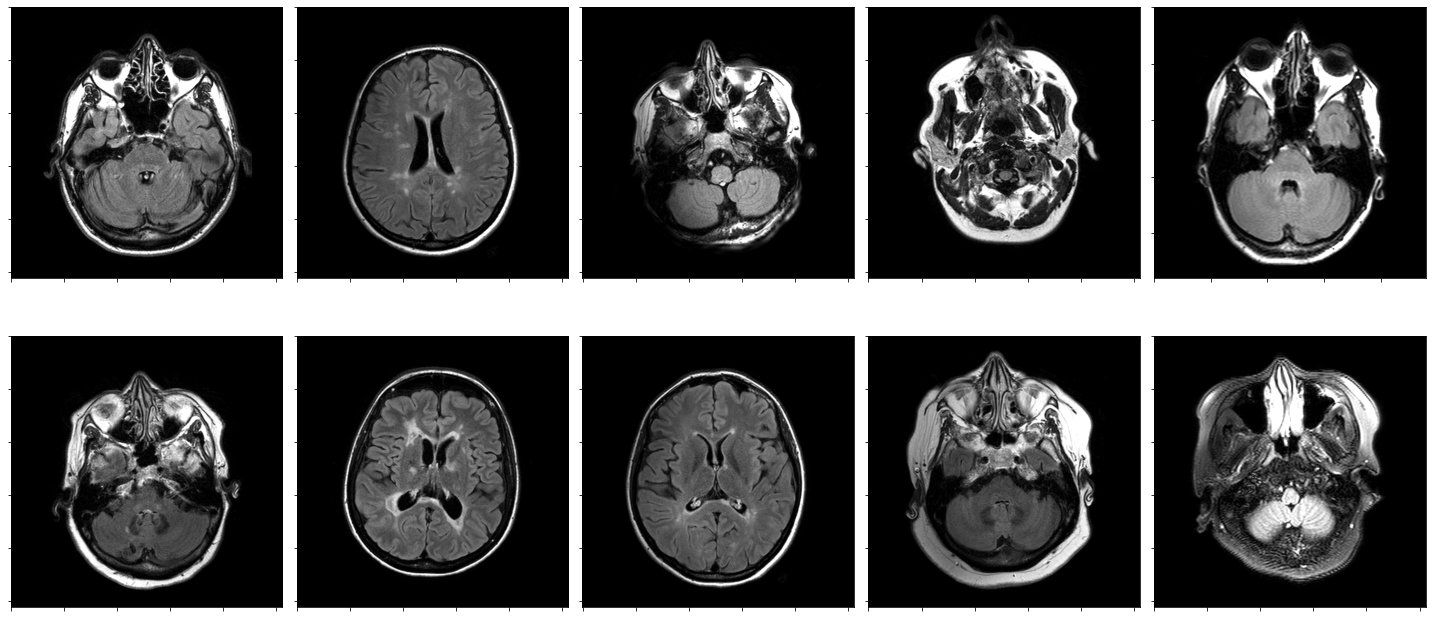

In [ ]:
em_images = get_file_paths('EM', ['bmp', 'png'], Path('/content/drive/MyDrive/Train'))
em_brains, _ = split_brain_and_mask(em_images)
plot_10_brain_images(random.sample(em_brains, 10))

In [ ]:
sle_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
100 - (np.sum(sle_predictions) / len(sle_predictions))